参考文献　https://qiita.com/chicken_data_analyst/items/76cbbc403293e1f4a53c

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.font_manager as fm
import matplotlib.font_manager as font_manager
from matplotlib.markers import TICKLEFT, TICKRIGHT, TICKUP, TICKDOWN, CARETLEFT, CARETRIGHT, CARETUP, CARETDOWN
from mpl_toolkits.mplot3d import axes3d, Axes3D
import sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.covariance import GraphicalLassoCV, GraphicalLasso
import scipy
import functools
import seaborn as sns
import glob
import datetime as dt
import gc
import sys
import tqdm as tq
from tqdm import tqdm
import time
import pickle
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import collections
# jpn_fonts=list(np.sort([ttf for ttf in fm.findSystemFonts() if 'ipaexg' in ttf or 'msgothic' in ttf or 'japan' in ttf or 'ipafont' in ttf]))
# jpn_font=jpn_fonts[0]
# prop = font_manager.FontProperties(fname=jpn_font)
# print(jpn_font)
# sns.set()

# import warnings
# warnings.simplefilter('ignore')

In [2]:
!pip install lingam

In [3]:
import graphviz
import lingam
from lingam.utils import make_dot
from lingam.utils import print_causal_directions, print_dagc

In [4]:
df_all = pd.read_csv('all.csv',encoding='shift-jis')
df_all

,Unnamed: 0,x,d1,d2,d3,d4,d5,w1,w2,w3,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,0,1,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,...,29,21,10,6,3,1.6111,3.1556,3.7000,3.6667,3.5000
1,1,2,11.0338,6.1047,7.2883,7.54295,9.90751,25.40064,16.89495,16.52988,...,14,8,12,21,3,3.0000,3.0000,3.0000,3.0000,3.0000
2,2,3,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,...,18,16,18,15,4,2.4667,2.4667,2.7333,2.6222,3.4222
3,3,4,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,...,28,16,17,11,4,2.2778,3.3778,3.9000,3.2889,3.7889
4,4,5,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,...,23,24,24,23,5,1.4444,4.4111,4.5778,4.1778,4.6889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,799,800,7.5822,0.1201,6.5722,3.32963,4.75933,22.04394,17.21857,11.89841,...,33,19,18,11,4,2.0000,4.3000,4.5000,4.5000,4.5000
800,800,801,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,...,33,18,24,10,4,2.4667,4.0556,4.2778,3.7778,4.0333
801,801,802,6.0455,2.0958,3.8635,4.97563,5.69270,28.18144,19.74430,19.20815,...,14,16,11,21,2,3.3778,3.2333,3.5333,3.5333,3.5333
802,802,803,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,...,28,26,17,6,4,1.8444,4.6111,4.2444,4.0222,4.3333


In [5]:
df_all = df_all[['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s']]

In [6]:
df_all.describe()

,d1,d2,d3,d4,d5,w1,w2,w3,w4,w5,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,...,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,6.211799,0.466710,4.467479,3.693894,5.667706,27.481096,18.670750,16.155680,16.642934,11.675986,...,23.766169,21.303483,17.304726,13.246269,3.914179,2.470222,3.460710,3.630446,3.421447,3.697470
std,2.279954,1.516064,1.630418,1.083217,1.259899,6.491396,4.414402,4.061546,4.052169,3.150284,...,6.567974,5.775151,5.478401,4.959768,0.954167,0.631644,0.628856,0.642970,0.663882,0.629797
min,-0.753800,-2.851000,0.844100,1.677050,2.625490,8.466880,5.481590,5.487490,5.485880,3.903220,...,5.000000,4.000000,0.000000,0.000000,2.000000,1.000000,1.200000,1.377800,1.222200,1.633300
25%,4.504200,-0.634875,3.322100,2.850433,4.835517,23.345895,15.907253,13.348640,13.887615,9.455010,...,19.000000,17.000000,14.000000,10.000000,3.000000,2.000000,3.000000,3.055600,3.000000,3.155600
50%,6.227950,0.224250,4.285100,3.524790,5.535405,26.988855,18.131240,16.332645,16.460940,11.709660,...,24.000000,21.000000,17.000000,13.000000,4.000000,2.466700,3.361150,3.600000,3.288900,3.677800
75%,7.813150,1.364100,5.554050,4.263863,6.400317,31.503912,21.704963,18.659005,19.072785,13.773820,...,29.000000,25.000000,21.000000,17.000000,5.000000,3.000000,3.880575,4.113875,3.902775,4.177800
max,11.550000,6.520000,8.276300,7.542950,9.907510,43.207130,28.747800,27.549800,27.926220,19.516100,...,47.000000,42.000000,34.000000,33.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
new_column_names = {'d1': '安全運転特性', 'd2': '不安定な運転特性','d3': '心配性特性', 'd4': 'ステイタス特性', 'd5': '事前準備特性','w1': '道路状況把握', 'w2': '心身状況','w3': '運転ペース阻害', 'w4': '車環境','w5': '視野環境','c1': '写真タイプ', 'c2': '三次元映像タイプ','c3': '言語映像タイプ', 'c4': '言語抽象タイプ','c5': '聴覚言語タイプ', 'c6': '聴覚&音タイプ','p': '行動変容フェーズ', 'none_s': '提示なし','image_s': '画像のみ', 'announce_s': '音声のみ','image_sound_s': '画像+報知音', 'image_announce_s': '画像+音声'}

In [8]:
df_all = df_all.rename(columns=new_column_names)

In [9]:
colsname = df_all.columns
colsname

Index(['安全運転特性', '不安定な運転特性', '心配性特性', 'ステイタス特性', '事前準備特性', '道路状況把握', '心身状況',
       '運転ペース阻害', '車環境', '視野環境', '写真タイプ', '三次元映像タイプ', '言語映像タイプ', '言語抽象タイプ',
       '聴覚言語タイプ', '聴覚&音タイプ', '行動変容フェーズ', '提示なし', '画像のみ', '音声のみ', '画像+報知音',
       '画像+音声'],
      dtype='object')

In [10]:
# df_sampleを標準化
df_std = df_all.copy()
ss = sklearn.preprocessing.StandardScaler()
df_std = pd.DataFrame(ss.fit_transform(df_std), columns=colsname)
display(df_std)

,安全運転特性,不安定な運転特性,心配性特性,ステイタス特性,事前準備特性,道路状況把握,心身状況,運転ペース阻害,車環境,視野環境,...,言語映像タイプ,言語抽象タイプ,聴覚言語タイプ,聴覚&音タイプ,行動変容フェーズ,提示なし,画像のみ,音声のみ,画像+報知音,画像+音声
0,0.035945,0.972259,1.408073,-0.567159,0.042771,1.461916,1.633699,1.266865,1.076806,1.018391,...,0.797367,-0.052582,-1.334198,-1.461919,-0.958688,-1.360982,-0.485485,0.108243,0.369652,-0.313740
1,2.116272,3.721150,1.731198,3.555570,3.367288,-0.320694,-0.402525,0.092190,-0.044941,0.010696,...,-1.487863,-2.305007,-0.968901,1.564298,-0.958688,0.839251,-0.733073,-0.981133,-0.635218,-1.108142
2,0.430716,1.080238,0.307426,1.821384,2.158360,0.380319,0.501975,0.847752,0.953193,1.016174,...,-0.878469,-0.918900,0.126991,0.353811,0.089999,-0.005579,-1.581649,-1.396185,-1.204649,-0.437349
3,0.740081,-0.952010,-0.111501,0.135049,-0.627644,-0.093088,0.060104,-0.036366,0.231412,-0.001803,...,0.645019,-0.918900,-0.055658,-0.453180,0.089999,-0.304826,-0.131925,0.419493,-0.199779,0.145265
4,1.542132,-0.285000,1.657367,0.196885,0.503714,2.424105,2.230638,2.101062,2.130905,2.487039,...,-0.116725,0.467208,1.222883,1.967794,1.138687,-1.625060,1.512241,1.474320,1.139996,1.575187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.601440,-0.228767,1.291712,-0.336489,-0.721440,-0.838116,-0.329169,-1.048842,-0.447386,-0.479384,...,1.406762,-0.399109,0.126991,-0.453180,0.089999,-0.744904,1.335461,1.353244,1.625626,1.275062
800,-0.261966,-0.790769,-1.711042,0.043810,-0.052049,0.323556,-0.666514,-0.311147,-0.147718,-0.408260,...,1.406762,-0.572373,1.222883,-0.654928,0.089999,-0.005579,0.946576,1.007445,0.537105,0.533568
801,-0.072985,1.075221,-0.370675,1.184005,0.019851,0.107955,0.243344,0.752022,-0.047578,0.199974,...,-1.487863,-0.918900,-1.151550,1.564298,-2.007376,1.437745,-0.361851,-0.151184,0.168587,-0.260833
802,1.080519,-0.586297,-1.864718,0.536825,-0.138864,0.551968,0.641863,0.799994,0.442240,1.047133,...,0.645019,0.813735,-0.055658,-1.461919,0.089999,-0.991398,1.830477,0.955466,0.905472,1.010209


In [11]:
%%time
# DirectLiNGAM
print(time.ctime())
model = lingam.DirectLiNGAM()
model.fit(df_std)
print(time.ctime())

# DAGを保存するなら実行
save_pickle = 'pickles'
os.makedirs(save_pickle, exist_ok=True)
#with open(save_pickle+'/model_DLingam.pickle', mode='wb') as f:
#    pickle.dump(model, f)

Thu Jun 27 14:17:51 2024
Thu Jun 27 14:17:52 2024
CPU times: user 660 ms, sys: 5.98 ms, total: 666 ms
Wall time: 534 ms


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

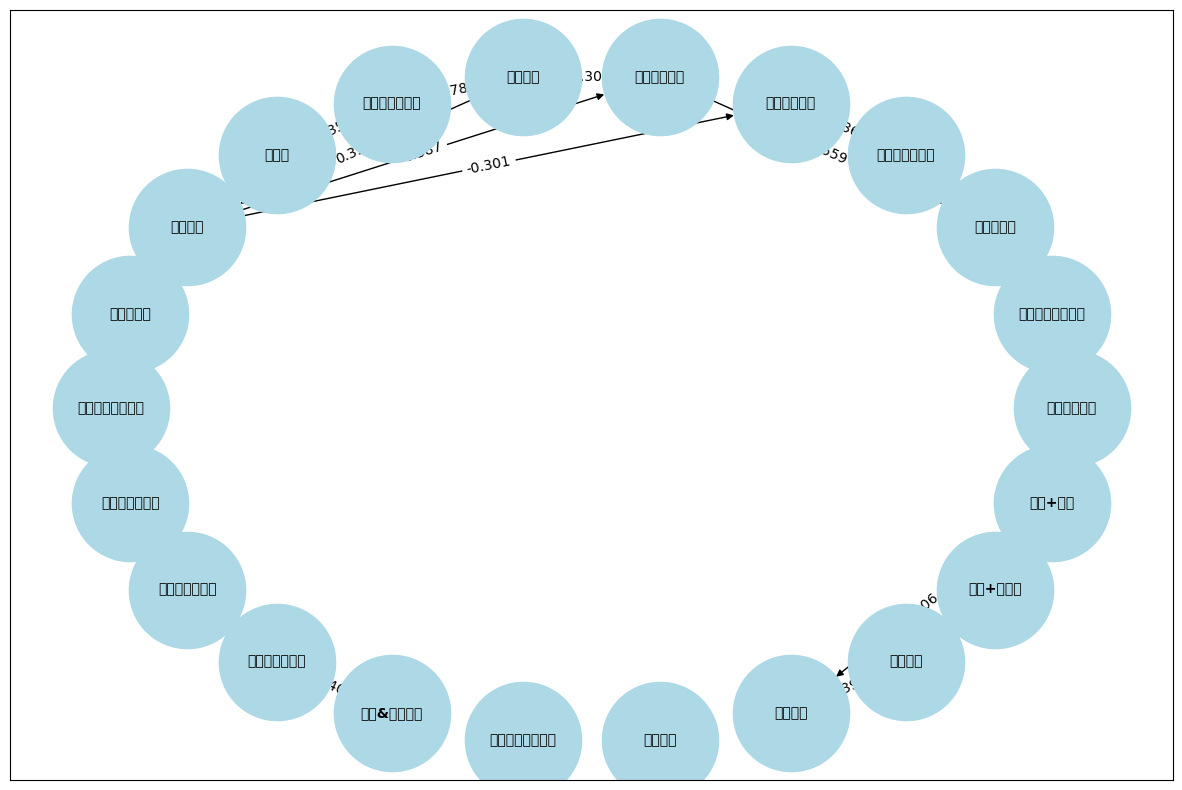

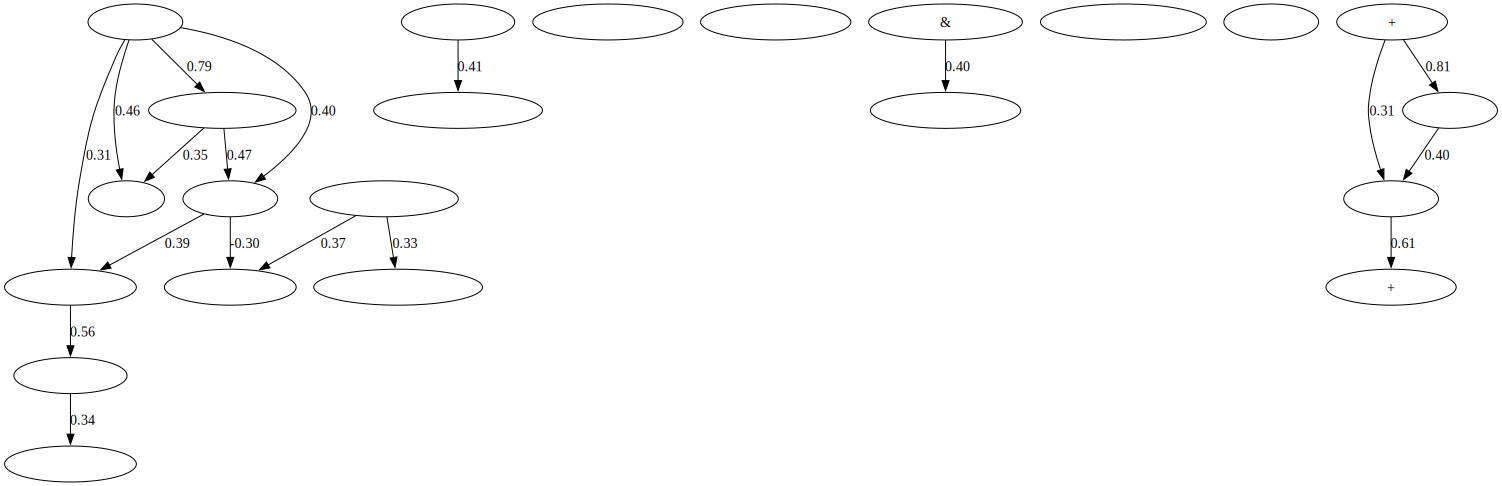

In [12]:
# 隣接行列の取得
adjacency_matrix = model.adjacency_matrix_

# フィルタリング
threshold = 0.30
filtered_adjacency_matrix = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)

# 有向グラフの作成
G = nx.from_numpy_array(filtered_adjacency_matrix.T, create_using=nx.DiGraph)
G = nx.relabel_nodes(G, dict(enumerate(colsname)))

# エッジラベルの作成
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True) if np.abs(d['weight']) > threshold}

# グラフの描画
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)
plt.show()

# make_dotを用いた可視化
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

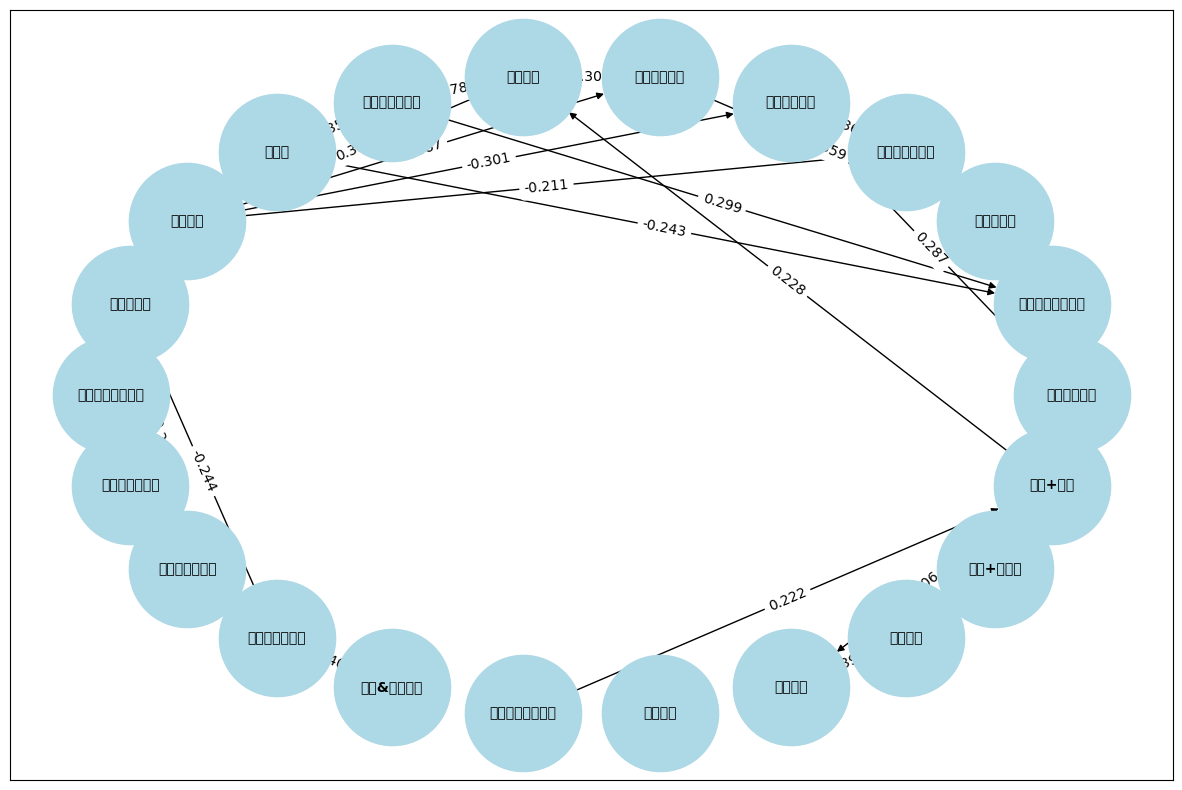

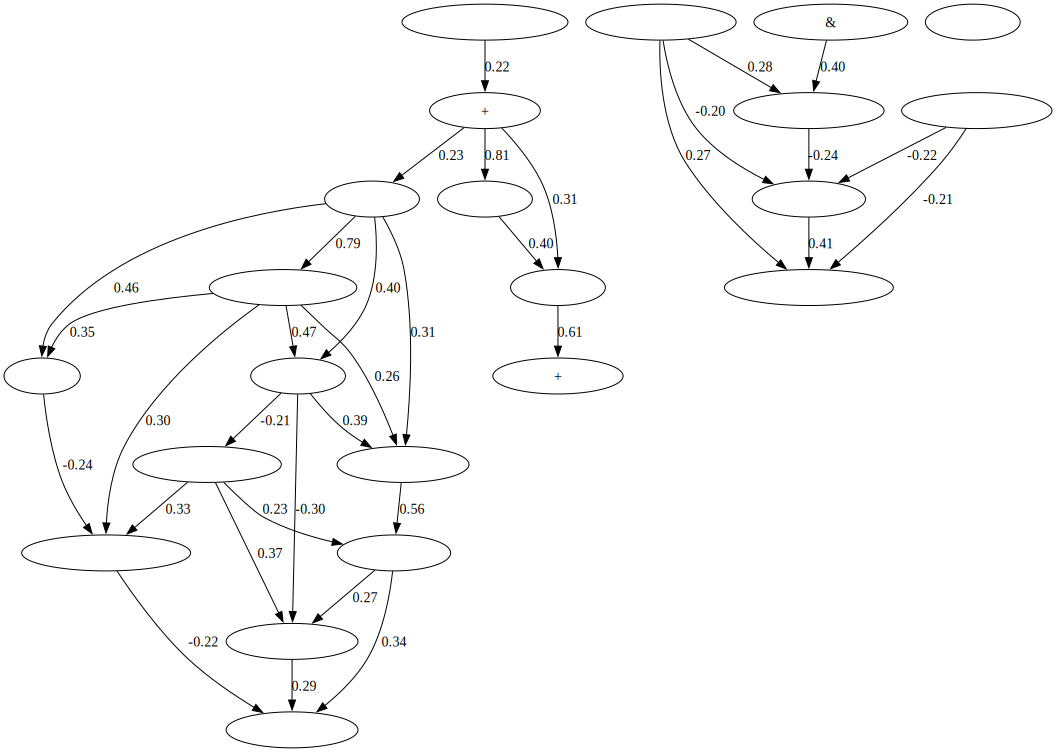

In [13]:
# 隣接行列の取得
adjacency_matrix = model.adjacency_matrix_

# フィルタリング
threshold = 0.20
filtered_adjacency_matrix = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)

# 有向グラフの作成
G = nx.from_numpy_array(filtered_adjacency_matrix.T, create_using=nx.DiGraph)
G = nx.relabel_nodes(G, dict(enumerate(colsname)))

# エッジラベルの作成
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True) if np.abs(d['weight']) > threshold}

# グラフの描画
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)
plt.show()

# make_dotを用いた可視化
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_10635/4235046914.py:9: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  plt.savefig("graph0627.png")
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_10635/4235046914.py:9: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  plt.savefig("graph0627.png")
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_10635/4235046914.py:9: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  plt.savefig("graph0627.png")
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_10635/4235046914.py:9: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  plt.savefig("graph0627.png")
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_10635/4235046914.py:9: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  plt.savefig("graph0627.png")
/var/folde

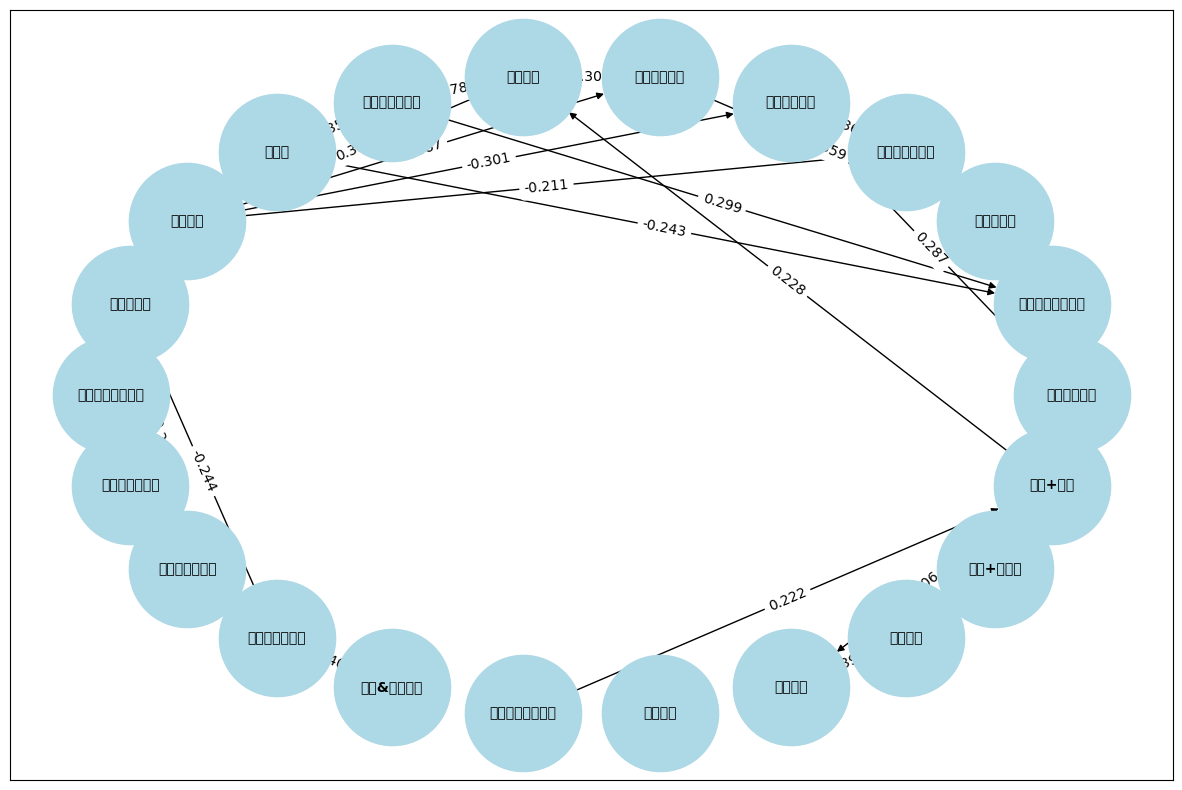

In [14]:
# グラフの描画と保存
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)

# 画像を保存
plt.savefig("graph0627.png")
plt.show()

In [15]:
from graphviz import Source

# make_dotを用いた可視化と保存
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
dot = make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

# dot形式で保存
dot.save('graph0627.dot')

# PNG形式で保存
dot.render('graph0627', format='png')

'graph0627.png'

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

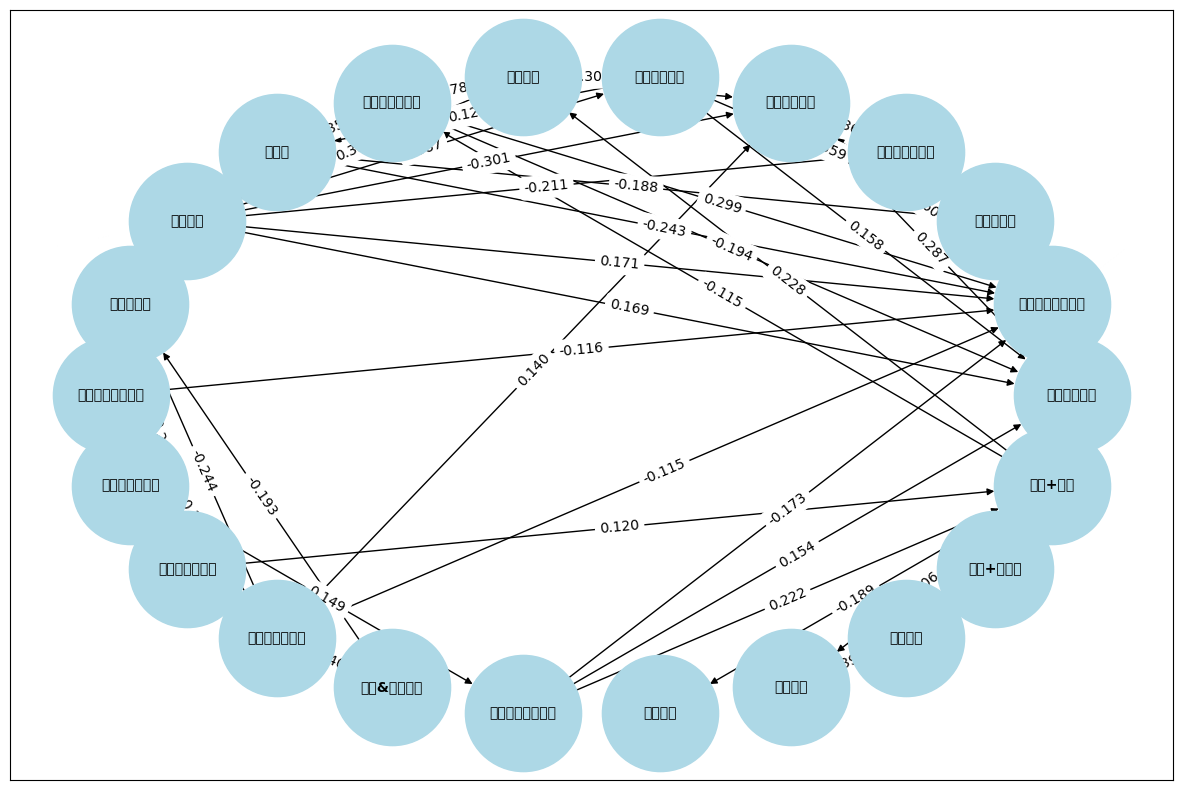

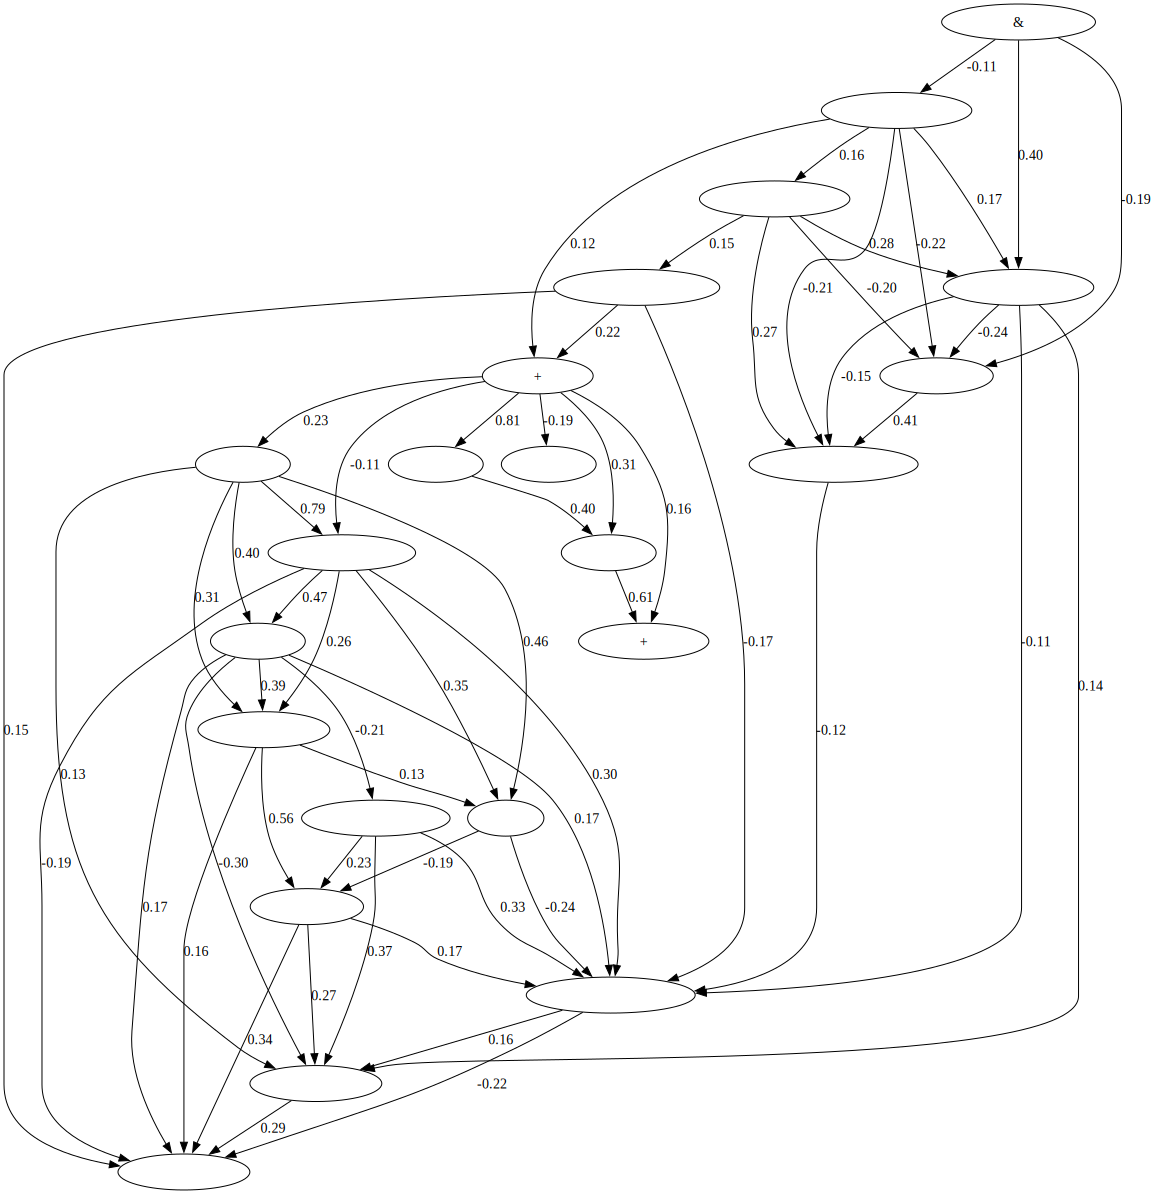

In [16]:
# 隣接行列の取得
adjacency_matrix = model.adjacency_matrix_

# フィルタリング
threshold = 0.1
filtered_adjacency_matrix = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)

# 有向グラフの作成
G = nx.from_numpy_array(filtered_adjacency_matrix.T, create_using=nx.DiGraph)
G = nx.relabel_nodes(G, dict(enumerate(colsname)))

# エッジラベルの作成
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True) if np.abs(d['weight']) > threshold}

# グラフの描画
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)
plt.show()

# make_dotを用いた可視化
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

<Figure size 1500x1000 with 0 Axes>

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

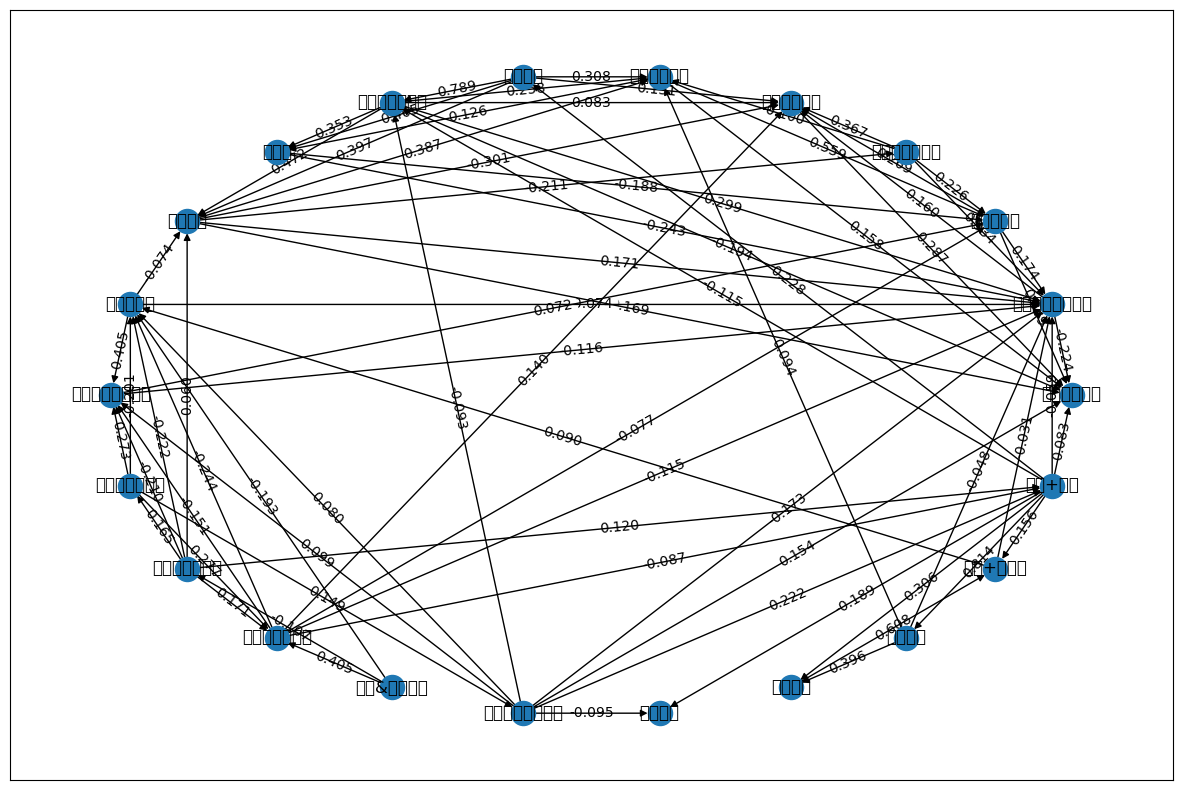

In [17]:
# 想定される因果
G = nx.DiGraph()  # 有向グラフ (Directed Graph)
# 頂点の追加
#G.add_node('Air temperature [K]')                
G.add_nodes_from(colsname)

# 隣接行列を有向グラフで可視化(networkx使用)
plt.figure(figsize=(15,10))
pos = nx.circular_layout(G, scale=1, center=None, dim=2)  # ここのポジションをこの先のplotでも使用する
# #pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
# nx.draw_networkx(G, pos)
# plt.grid(False)
# plt.show()
adjacency_ = pd.DataFrame(model.adjacency_matrix_, columns=colsname, index=colsname)
G=nx.from_pandas_adjacency(adjacency_.T, create_using=nx.DiGraph)  # 列が原因、行が結果なのでnetworkxでは転置の必要がある
plt.figure(figsize=(15,10))
#pos = nx.bipartite_layout(G, colsname[:5])
#pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
edge_labels = dict([((u,v,), f"{d['weight']:.3f}") for u,v,d in G.edges(data=True)])#nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw_networkx(G, pos)
plt.grid(False)
plt.show()

[15, 13, 12, 14, 16, 21, 19, 18, 20, 17, 10, 11, 6, 7, 9, 3, 5, 8, 2, 1, 4, 0]
['聴覚&音タイプ' '言語抽象タイプ' '言語映像タイプ' '聴覚言語タイプ' '行動変容フェーズ' '画像+音声' '音声のみ' '画像のみ'
 '画像+報知音' '提示なし' '写真タイプ' '三次元映像タイプ' '心身状況' '運転ペース阻害' '視野環境' 'ステイタス特性'
 '道路状況把握' '車環境' '心配性特性' '不安定な運転特性' '事前準備特性' '安全運転特性']


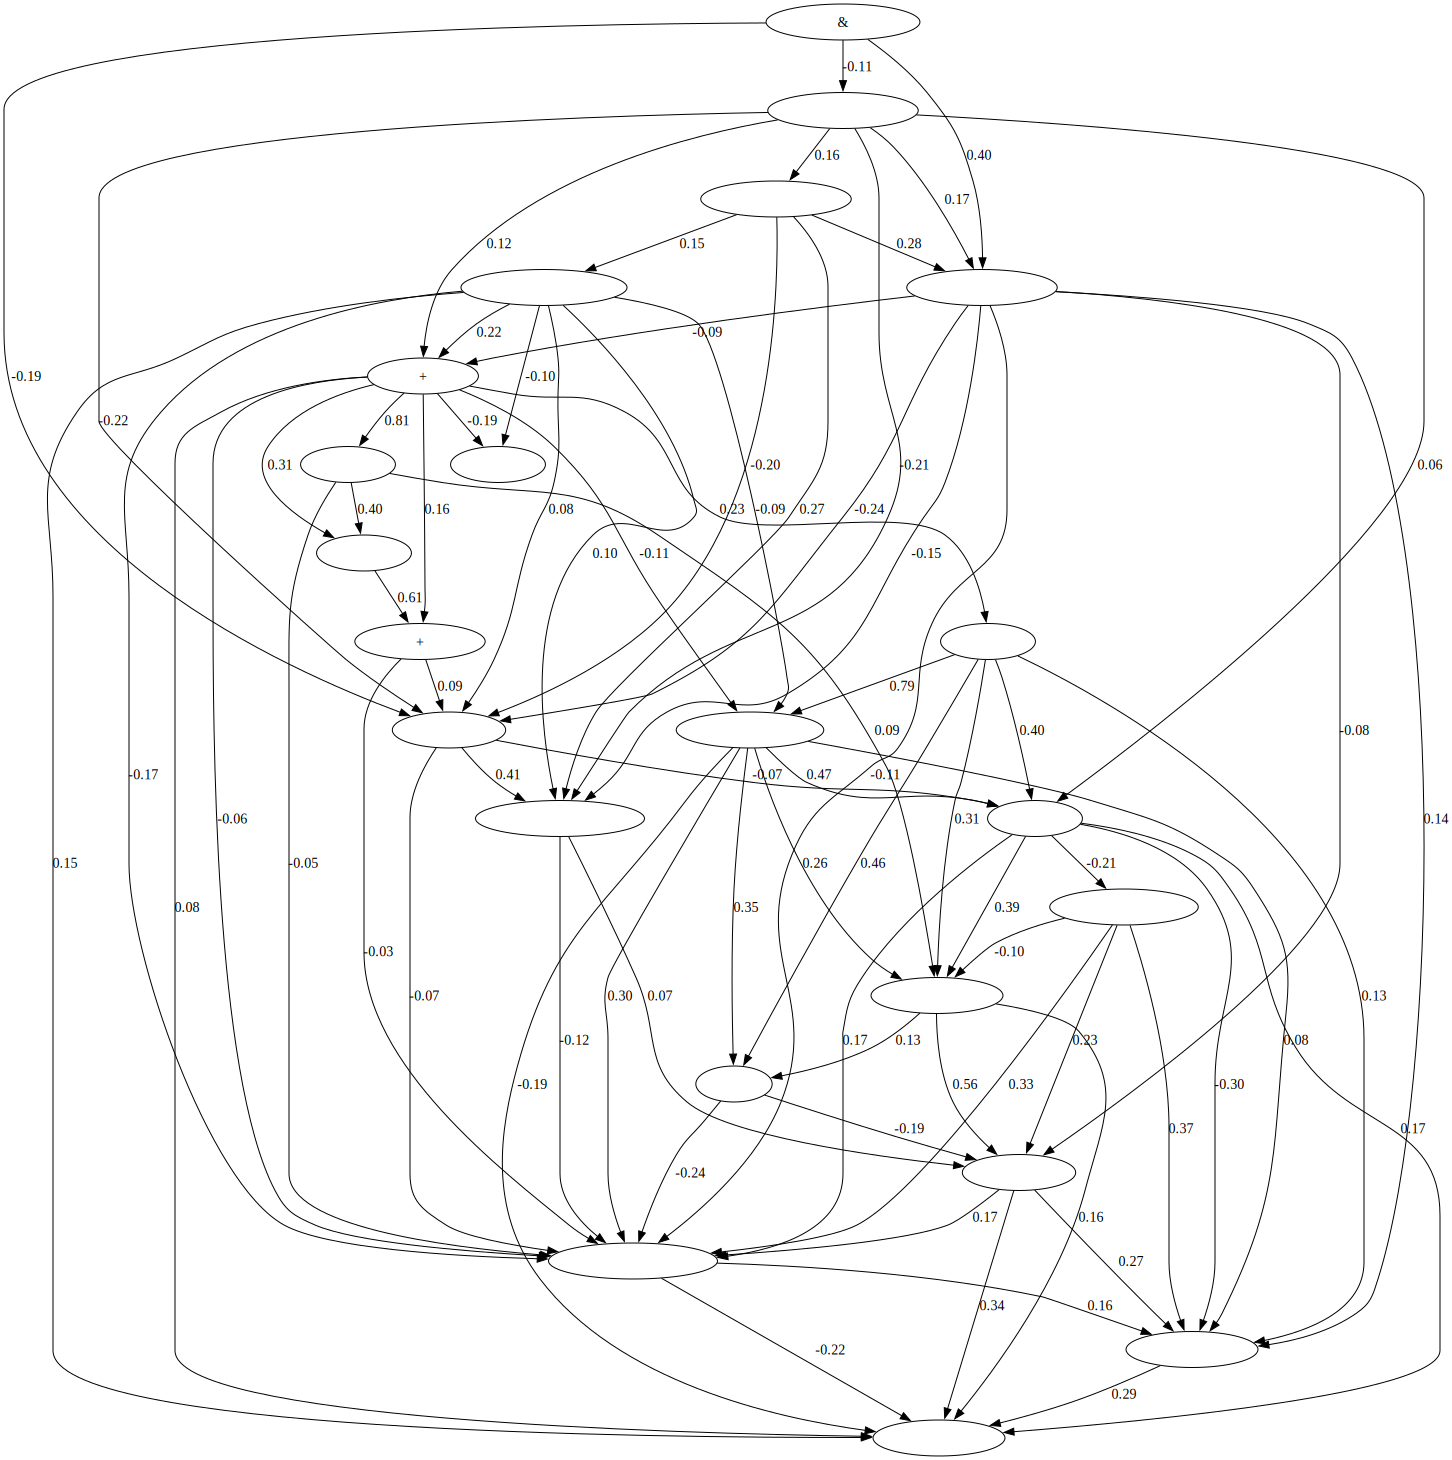

In [18]:
# 隣接行列を有向グラフで可視化(make_dot使用)
print(model.causal_order_)
print(np.array(colsname)[model.causal_order_])
#print(model.adjacency_matrix_)
make_dot(model.adjacency_matrix_, labels=list(colsname))

ブートストラップ法　参考URL https://qiita.com/ts5129nk/items/03d6a73c36ecedad2535

In [19]:
# #ブートストラップ実行
# result = model.bootstrap(x, n_sampling=100)
# #結果の表示
# causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)

# df_b = pd.DataFrame(causal_effects)
# df_b['from'] = df_b['from'].apply(lambda x : colsname[x])
# df_b['to'] = df_b['to'].apply(lambda x : colsname[x])
# #効果の降順でソート
# df_b=df_b.sort_values('effect', ascending=False)
# df_b

In [20]:
%%time
# DirectLiNGAM bootstrap
print(time.ctime())
n_sampling = 1000
model = lingam.DirectLiNGAM()
result = model.bootstrap(df_std, n_sampling=n_sampling)
print(time.ctime())

# DAGを保存するなら実行
save_pickle = 'pickles'
os.makedirs(save_pickle, exist_ok=True)
#with open(save_pickle+'/model_DLingam_bootstrap.pickle', mode='wb') as f:
#    pickle.dump(model, f)

Thu Jun 27 14:18:04 2024
Thu Jun 27 14:34:35 2024
CPU times: user 32min 39s, sys: 11min 34s, total: 44min 13s
Wall time: 16min 30s


[2, 3, 19, 16, 15, 11, 13, 12, 21, 0, 5, 14, 6, 8, 7, 1, 18, 9, 20, 10, 4, 17]
['心配性特性' 'ステイタス特性' '音声のみ' '行動変容フェーズ' '聴覚&音タイプ' '三次元映像タイプ' '言語抽象タイプ'
 '言語映像タイプ' '画像+音声' '安全運転特性' '道路状況把握' '聴覚言語タイプ' '心身状況' '車環境' '運転ペース阻害'
 '不安定な運転特性' '画像のみ' '視野環境' '画像+報知音' '写真タイプ' '事前準備特性' '提示なし']


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

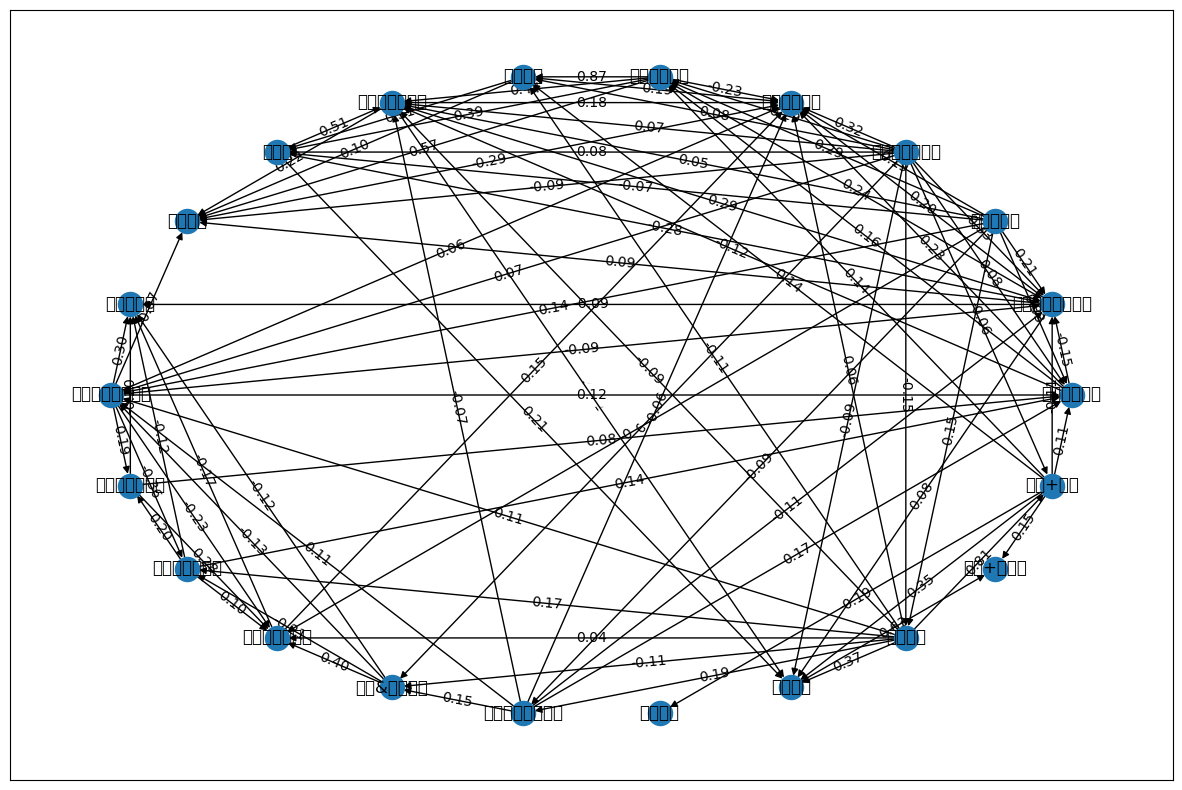

In [21]:
# 隣接行列を有向グラフで可視化(networkx使用)
print(model.causal_order_)
print(np.array(colsname)[model.causal_order_])
#print(model.adjacency_matrix_)

adjacency_ = pd.DataFrame(model.adjacency_matrix_, columns=colsname, index=colsname)
G=nx.from_pandas_adjacency(adjacency_.T, create_using=nx.DiGraph)  # 列が原因、行が結果なのでnetworkxでは転置の必要がある
plt.figure(figsize=(15,10))
#pos = nx.bipartite_layout(G, colsname[:5])
#pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
edge_labels = edge_labels = dict([((u,v,), f"{d['weight']:.2f}") for u,v,d in G.edges(data=True)])#nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw_networkx(G, pos)
plt.grid(False)
plt.show()

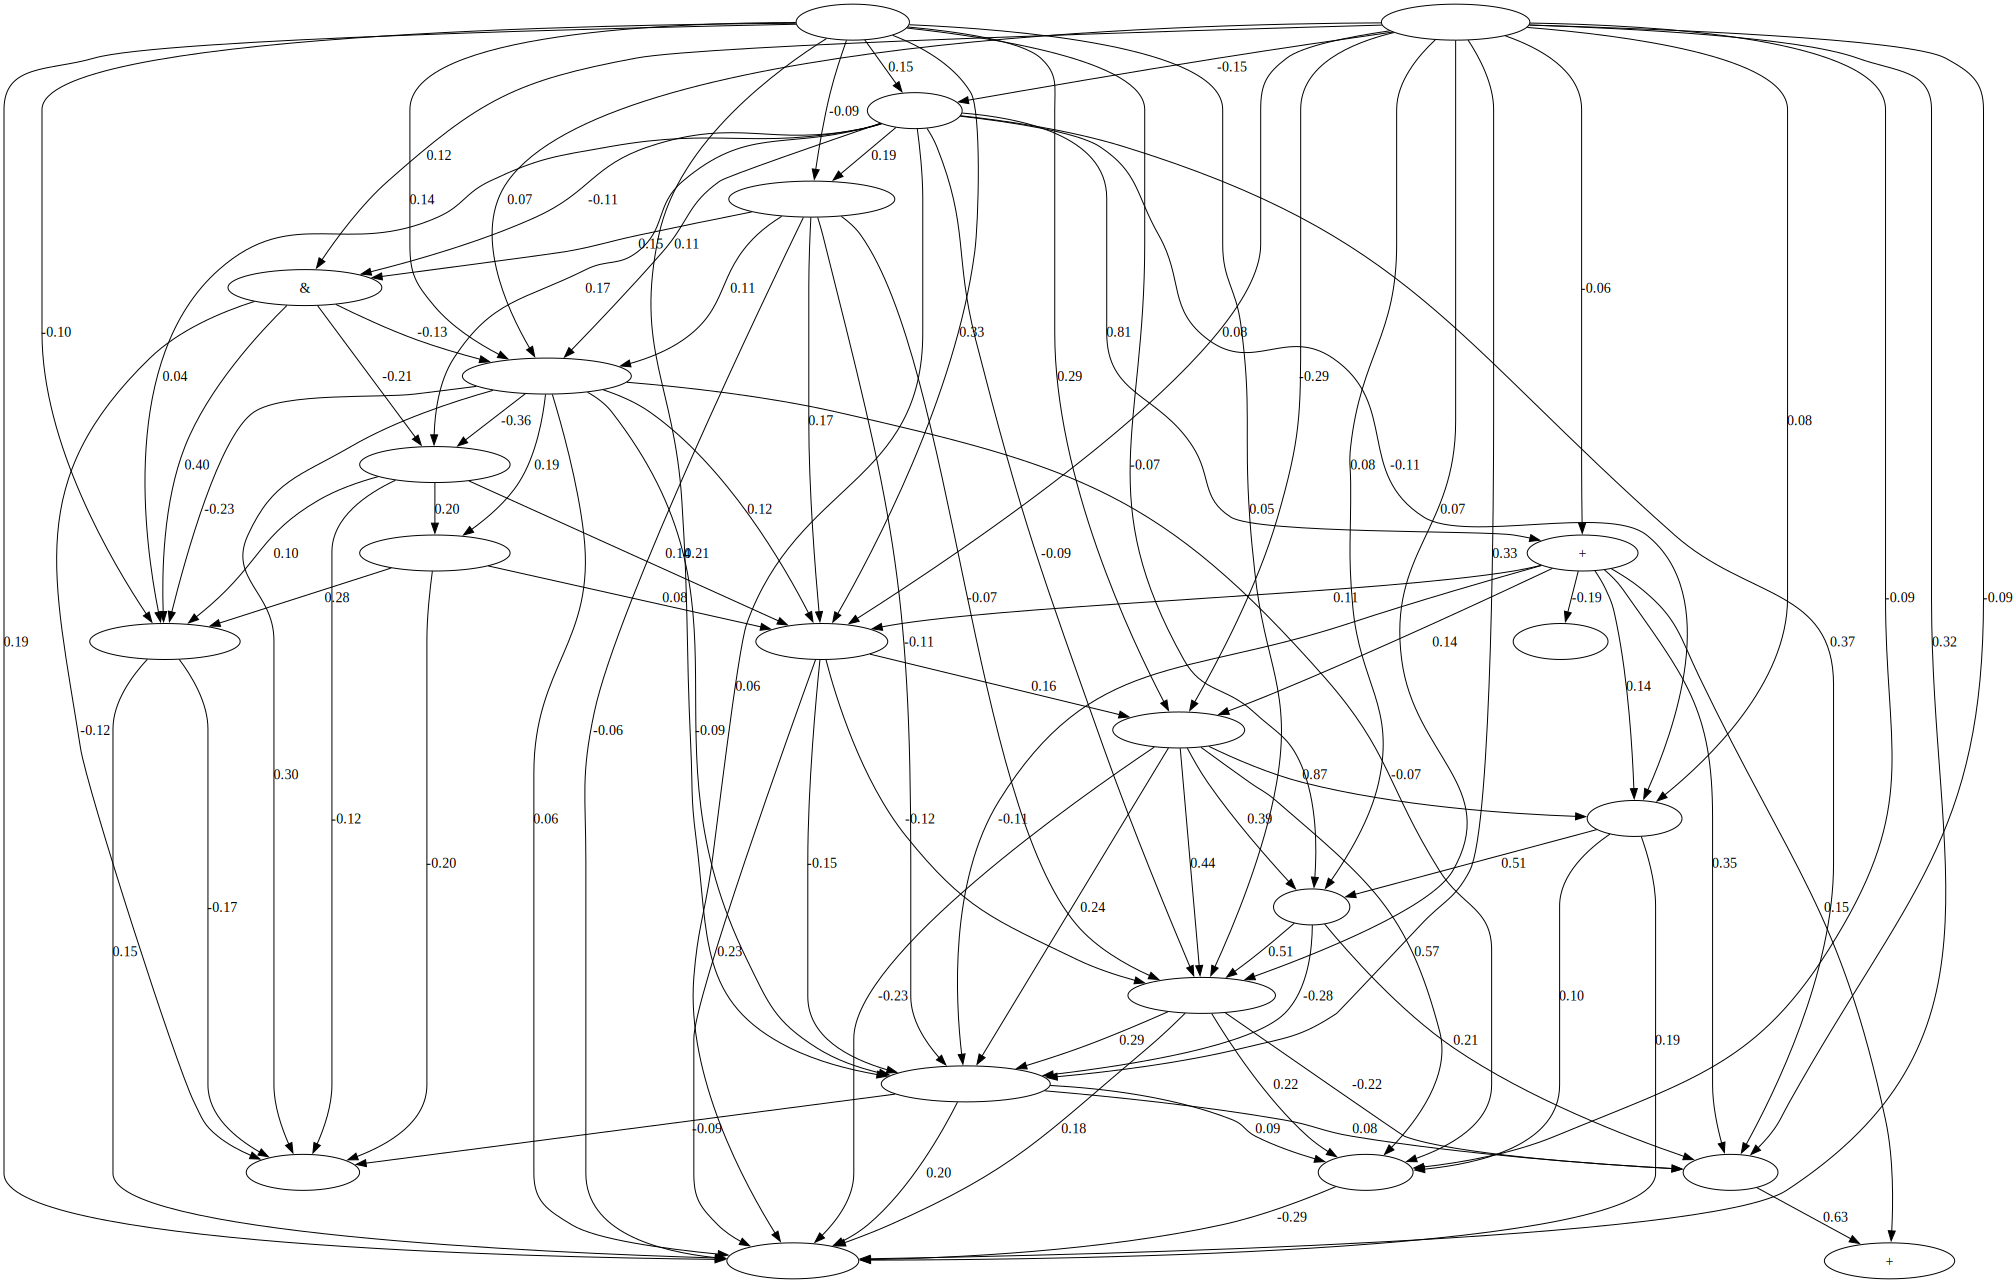

In [22]:
# 隣接行列を有向グラフで可視化(make_dot使用)
make_dot(model.adjacency_matrix_, labels=list(colsname))

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

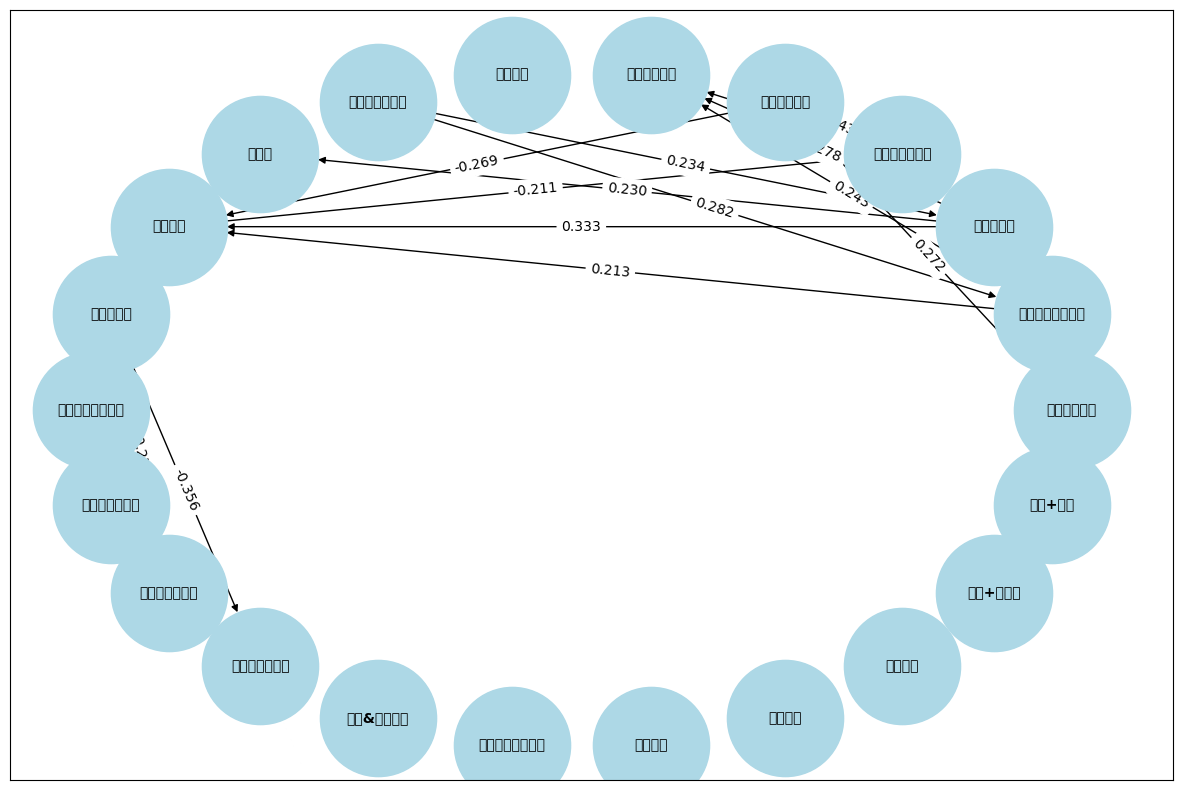

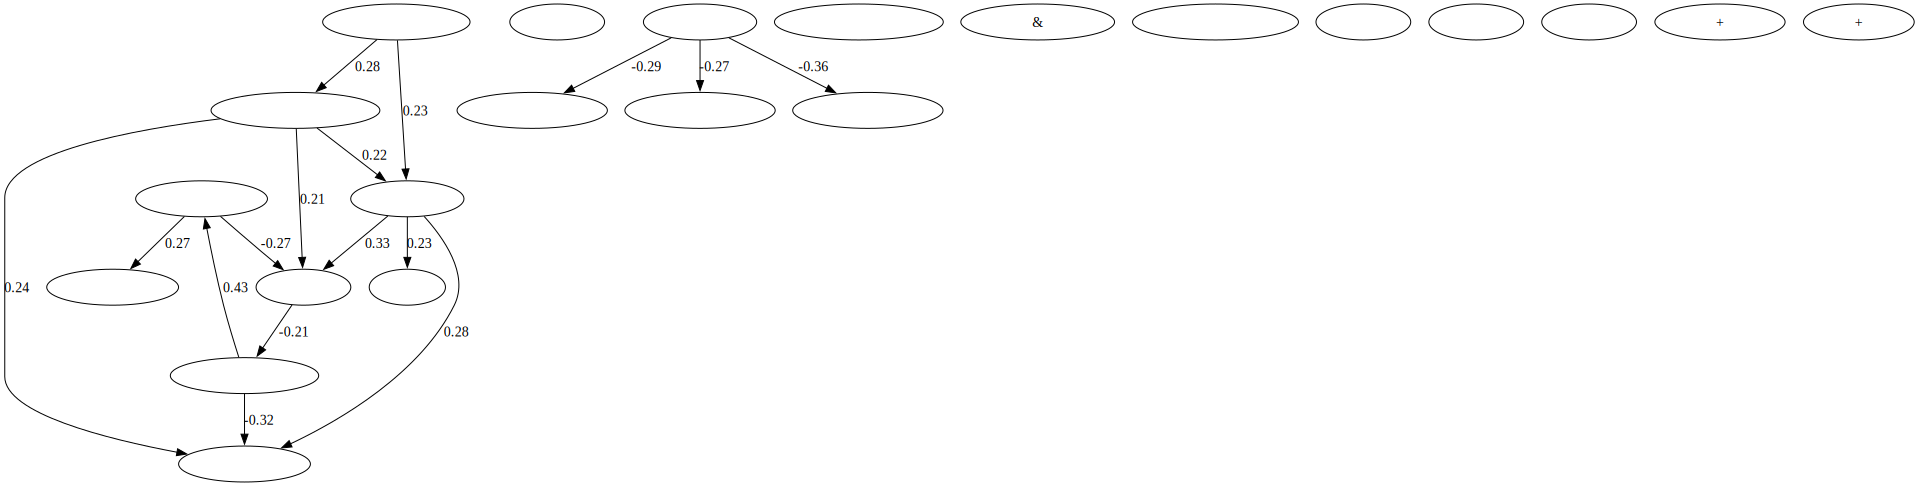

In [49]:
# 隣接行列の取得
adjacency_matrix = model.adjacency_matrix_

# フィルタリング
threshold = 0.20
filtered_adjacency_matrix = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)

# 有向グラフの作成
G = nx.from_numpy_array(filtered_adjacency_matrix.T, create_using=nx.DiGraph)
G = nx.relabel_nodes(G, dict(enumerate(colsname)))

# エッジラベルの作成
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True) if np.abs(d['weight']) > threshold}

# グラフの描画
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)
plt.show()

# make_dotを用いた可視化
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

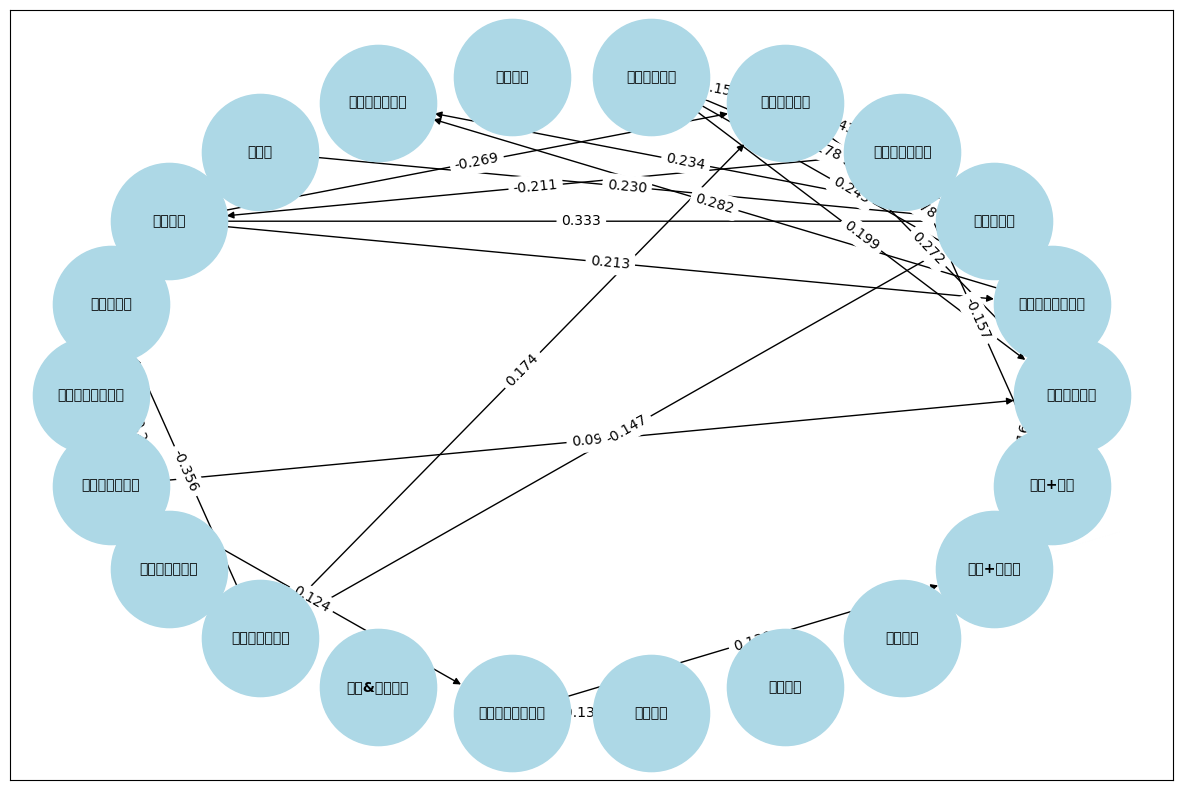

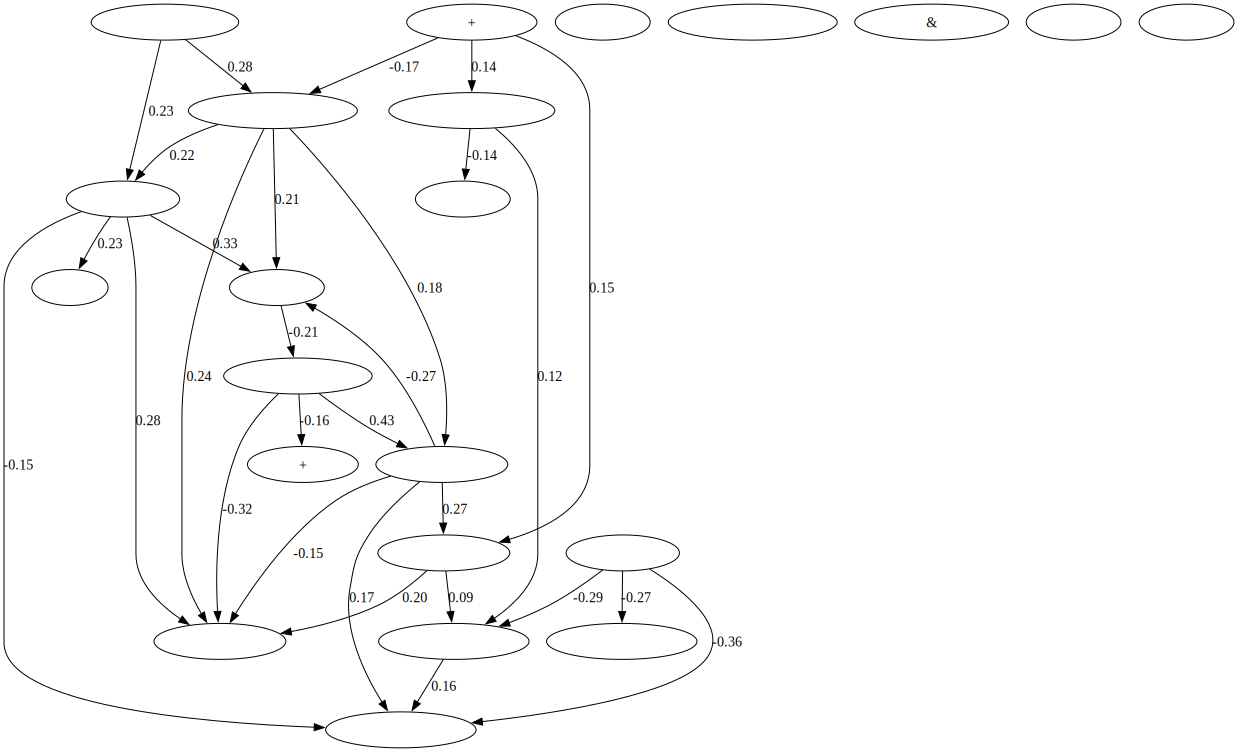

In [55]:
# 隣接行列の取得
adjacency_matrix = model.adjacency_matrix_

# フィルタリング
threshold = 0.09
filtered_adjacency_matrix = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)

# 有向グラフの作成
G = nx.from_numpy_array(filtered_adjacency_matrix.T, create_using=nx.DiGraph)
G = nx.relabel_nodes(G, dict(enumerate(colsname)))

# エッジラベルの作成
edge_labels = {(u, v): f"{d['weight']:.3f}" for u, v, d in G.edges(data=True) if np.abs(d['weight']) > threshold}

# グラフの描画
plt.figure(figsize=(15, 10))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size=7000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.grid(False)
plt.show()

# make_dotを用いた可視化
filtered_adjacency_matrix_dot = np.where(np.abs(adjacency_matrix) > threshold, adjacency_matrix, 0)
make_dot(filtered_adjacency_matrix_dot, labels=list(colsname))

In [23]:
%%time
# DirectLiNGAM bootstrap result
print(time.ctime())
dagc = result.get_directed_acyclic_graph_counts(n_dags=5, min_causal_effect=0.1, split_by_causal_effect_sign=True)
print_dagc(dagc, n_sampling)
print(time.ctime())

Thu Jun 27 14:34:35 2024
DAG[0]: 0.1%
	x0 <--- x1 (b<0)
	x0 <--- x4 (b>0)
	x0 <--- x7 (b<0)
	x0 <--- x9 (b>0)
	x0 <--- x16 (b>0)
	x0 <--- x18 (b>0)
	x1 <--- x3 (b>0)
	x1 <--- x7 (b>0)
	x1 <--- x9 (b>0)
	x1 <--- x11 (b<0)
	x1 <--- x14 (b<0)
	x1 <--- x16 (b<0)
	x2 <--- x0 (b>0)
	x2 <--- x1 (b>0)
	x2 <--- x4 (b>0)
	x2 <--- x9 (b>0)
	x2 <--- x14 (b<0)
	x3 <--- x7 (b>0)
	x3 <--- x9 (b<0)
	x4 <--- x1 (b>0)
	x4 <--- x3 (b>0)
	x4 <--- x7 (b>0)
	x4 <--- x9 (b<0)
	x4 <--- x11 (b>0)
	x4 <--- x14 (b>0)
	x5 <--- x2 (b>0)
	x5 <--- x6 (b>0)
	x5 <--- x7 (b>0)
	x5 <--- x8 (b>0)
	x5 <--- x9 (b>0)
	x6 <--- x7 (b>0)
	x6 <--- x8 (b>0)
	x6 <--- x9 (b>0)
	x6 <--- x21 (b>0)
	x8 <--- x1 (b<0)
	x8 <--- x7 (b>0)
	x8 <--- x9 (b>0)
	x9 <--- x7 (b>0)
	x10 <--- x11 (b>0)
	x10 <--- x13 (b<0)
	x10 <--- x15 (b<0)
	x11 <--- x13 (b<0)
	x11 <--- x16 (b>0)
	x11 <--- x18 (b>0)
	x12 <--- x10 (b<0)
	x12 <--- x11 (b>0)
	x12 <--- x14 (b>0)
	x12 <--- x15 (b<0)
	x13 <--- x9 (b>0)
	x14 <--- x9 (b<0)
	x14 <--- x10 (b<0)
	x14 <--- x

In [24]:
%%time
# DirectLiNGAM bootstrap result
print(time.ctime())
cdc = result.get_causal_direction_counts(n_directions=10, min_causal_effect=0.1, split_by_causal_effect_sign=True)
print_causal_directions(cdc, n_sampling)
print(time.ctime())

Thu Jun 27 14:34:36 2024
x20 <--- x18 (b>0) (97.0%)
x4 <--- x3 (b>0) (94.9%)
x0 <--- x2 (b>0) (93.4%)
x1 <--- x16 (b<0) (91.9%)
x0 <--- x16 (b>0) (91.1%)
x4 <--- x1 (b>0) (84.1%)
x1 <--- x3 (b>0) (83.1%)
x18 <--- x19 (b>0) (80.9%)
x4 <--- x2 (b>0) (75.7%)
x14 <--- x12 (b>0) (75.5%)
Thu Jun 27 14:34:36 2024
CPU times: user 83 ms, sys: 2.28 ms, total: 85.2 ms
Wall time: 85.2 ms


In [25]:
for i in range(0, 22):
    print(f'x{i} : {colsname[i]}')

x0 : 安全運転特性
x1 : 不安定な運転特性
x2 : 心配性特性
x3 : ステイタス特性
x4 : 事前準備特性
x5 : 道路状況把握
x6 : 心身状況
x7 : 運転ペース阻害
x8 : 車環境
x9 : 視野環境
x10 : 写真タイプ
x11 : 三次元映像タイプ
x12 : 言語映像タイプ
x13 : 言語抽象タイプ
x14 : 聴覚言語タイプ
x15 : 聴覚&音タイプ
x16 : 行動変容フェーズ
x17 : 提示なし
x18 : 画像のみ
x19 : 音声のみ
x20 : 画像+報知音
x21 : 画像+音声


In [47]:
causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)

# Assign to pandas.DataFrame for pretty display
df = pd.DataFrame(causal_effects)
labels = [f'x{i}' for i in range(df_std.shape[1])]
df['from'] = df['from'].apply(lambda x : labels[x])
df['to'] = df['to'].apply(lambda x : labels[x])
df

,from,to,effect,probability
0,x16,x0,0.212198,0.973
1,x18,x20,0.616974,0.970
2,x3,x4,0.466466,0.949
3,x19,x20,0.394251,0.942
4,x2,x0,0.402785,0.934
...,...,...,...,...
457,x20,x18,0.572470,0.030
458,x20,x19,0.186432,0.029
459,x0,x16,0.229337,0.027
460,x4,x16,-0.012725,0.023


In [53]:
df[df['from']=='x6']

,from,to,effect,probability
91,x6,x0,0.147841,0.575
94,x6,x4,0.040330,0.567
134,x6,x9,0.335177,0.488
192,x6,x5,0.450095,0.399
201,x6,x1,0.036035,0.392
223,x6,x7,0.343271,0.375
227,x6,x8,0.635588,0.368
244,x6,x2,0.218246,0.338
300,x6,x3,-0.149697,0.259
342,x6,x20,0.071245,0.224


In [54]:
df[df['to']=='x6']

,from,to,effect,probability
23,x21,x6,0.141721,0.730
44,x3,x6,-0.062412,0.652
50,x8,x6,0.497026,0.632
52,x19,x6,0.118849,0.631
73,x5,x6,0.829741,0.601
77,x13,x6,0.045949,0.593
88,x2,x6,0.288198,0.578
107,x16,x6,0.016368,0.548
131,x7,x6,0.311863,0.491
135,x9,x6,0.219368,0.487


In [48]:
#dfをxlsxで保存
df.to_excel('causal_effects.xlsx', index=False)

In [26]:
%%time
# DirectLiNGAM bootstrap result
print(time.ctime())
prob = result.get_probabilities(min_causal_effect=0.1)
prob = np.where(prob<0.01, 0, prob)
prob = pd.DataFrame(prob, columns=colsname, index=colsname)
display(prob)
print(time.ctime())

Thu Jun 27 14:34:36 2024


,安全運転特性,不安定な運転特性,心配性特性,ステイタス特性,事前準備特性,道路状況把握,心身状況,運転ペース阻害,車環境,視野環境,...,言語映像タイプ,言語抽象タイプ,聴覚言語タイプ,聴覚&音タイプ,行動変容フェーズ,提示なし,画像のみ,音声のみ,画像+報知音,画像+音声
安全運転特性,0.000,0.637,0.934,0.352,0.527,0.412,0.242,0.563,0.296,0.378,...,0.078,0.068,0.133,0.064,0.911,0.010,0.065,0.176,0.016,0.268
不安定な運転特性,0.322,0.000,0.553,0.831,0.147,0.260,0.058,0.632,0.494,0.484,...,0.031,0.015,0.328,0.021,0.919,0.000,0.086,0.227,0.110,0.251
心配性特性,0.066,0.427,0.000,0.297,0.234,0.449,0.121,0.069,0.323,0.063,...,0.000,0.000,0.237,0.014,0.014,0.015,0.000,0.063,0.000,0.023
ステイタス特性,0.043,0.169,0.235,0.000,0.051,0.416,0.071,0.241,0.085,0.259,...,0.021,0.062,0.140,0.150,0.060,0.073,0.082,0.059,0.043,0.073
事前準備特性,0.471,0.841,0.757,0.949,0.000,0.267,0.315,0.397,0.144,0.727,...,0.000,0.000,0.643,0.013,0.000,0.000,0.015,0.036,0.000,0.034
道路状況把握,0.056,0.083,0.421,0.387,0.068,0.000,0.399,0.447,0.327,0.414,...,0.000,0.175,0.054,0.050,0.012,0.027,0.048,0.197,0.000,0.196
心身状況,0.000,0.000,0.058,0.022,0.000,0.601,0.000,0.182,0.632,0.394,...,0.000,0.024,0.000,0.026,0.000,0.000,0.013,0.047,0.000,0.256
運転ペース阻害,0.066,0.120,0.045,0.151,0.051,0.550,0.261,0.000,0.398,0.514,...,0.000,0.013,0.000,0.000,0.085,0.000,0.018,0.181,0.000,0.052
車環境,0.014,0.178,0.095,0.173,0.012,0.611,0.368,0.602,0.000,0.264,...,0.000,0.000,0.000,0.000,0.023,0.000,0.000,0.023,0.013,0.011
視野環境,0.020,0.118,0.073,0.121,0.056,0.586,0.443,0.484,0.102,0.000,...,0.000,0.059,0.000,0.000,0.000,0.000,0.000,0.027,0.000,0.031


Thu Jun 27 14:34:36 2024
CPU times: user 17.3 ms, sys: 3.37 ms, total: 20.7 ms
Wall time: 38.2 ms


In [45]:
prob.to_excel('pandas_to_excel_prob.xlsx', sheet_name='new_sheet_name')

In [27]:
from_index = 0 # index of x0
to_index = 1 # index of x3
# 開始変数から終了変数までのすべてのパスとそのブートストラップ確率を取得
display(pd.DataFrame(result.get_paths(from_index, to_index)))
print(time.ctime())

,path,effect,probability
0,"[0, 1]",-1.768091e-01,0.333
1,"[0, 7, 1]",-1.980519e-02,0.077
2,"[0, 8, 1]",-1.872577e-02,0.033
3,"[0, 7, 8, 1]",8.567806e-03,0.029
4,"[0, 11, 1]",-1.236092e-02,0.022
...,...,...,...
814,"[0, 13, 11, 1]",2.767046e-03,0.001
815,"[0, 13, 11, 12, 1]",5.364159e-04,0.001
816,"[0, 13, 11, 14, 1]",-3.340218e-04,0.001
817,"[0, 12, 15, 3, 6, 21, 18, 17, 1]",-2.625287e-07,0.001


Thu Jun 27 14:34:36 2024


In [37]:
import pandas as pd
from itertools import product

# 0から21の範囲で全てのfrom_indexとto_indexの組み合わせを生成
index_range = range(22)
index_combinations = list(product(index_range, index_range))

# 結果を格納するためのデータフレームリスト
filtered_paths_list = []

# 各組み合わせについてパスを取得してフィルタリング
for from_index, to_index in index_combinations:
    if from_index != to_index:
        paths_df = pd.DataFrame(result.get_paths(from_index, to_index))
        filtered_paths_df = paths_df[paths_df['probability'] >= 0.4]
        if not filtered_paths_df.empty:
            filtered_paths_df['from_index'] = from_index
            filtered_paths_df['to_index'] = to_index
            filtered_paths_list.append(filtered_paths_df)

# すべてのフィルタリングされたパスを結合
all_filtered_paths_df = pd.concat(filtered_paths_list, ignore_index=True)

# フィルタリングされたデータフレームを表示
display(all_filtered_paths_df)

# 現在の時刻を表示
print(time.ctime())

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_10635/889815230.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_paths_df['from_index'] = from_index
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_10635/889815230.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_paths_df['to_index'] = to_index
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_10635/889815230.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,path,effect,probability,from_index,to_index
0,"[0, 4]",0.214954,0.471,0,4
1,"[1, 0]",-0.202710,0.651,1,0
2,"[1, 2]",0.200235,0.435,1,2
3,"[1, 4]",0.213366,0.846,1,4
4,"[2, 0]",0.373881,0.934,2,0
...,...,...,...,...,...
103,"[21, 17]",-0.208679,0.565,21,17
104,"[21, 18]",0.314353,0.623,21,18
105,"[21, 19]",0.800526,0.409,21,19
106,"[21, 20]",0.151712,0.621,21,20


Thu Jun 27 18:28:25 2024


In [38]:
all_filtered_paths_df

,path,effect,probability,from_index,to_index
0,"[0, 4]",0.214954,0.471,0,4
1,"[1, 0]",-0.202710,0.651,1,0
2,"[1, 2]",0.200235,0.435,1,2
3,"[1, 4]",0.213366,0.846,1,4
4,"[2, 0]",0.373881,0.934,2,0
...,...,...,...,...,...
103,"[21, 17]",-0.208679,0.565,21,17
104,"[21, 18]",0.314353,0.623,21,18
105,"[21, 19]",0.800526,0.409,21,19
106,"[21, 20]",0.151712,0.621,21,20


In [39]:
df_all_filltered_paths  = pd.DataFrame(all_filtered_paths_df)
df_all_filltered_paths['from_index'] = df_all_filltered_paths['from_index'].apply(lambda x : colsname[x])
df_all_filltered_paths['to_index'] = df_all_filltered_paths['to_index'].apply(lambda x : colsname[x])
df_all_filltered_paths 

,path,effect,probability,from_index,to_index
0,"[0, 4]",0.214954,0.471,安全運転特性,事前準備特性
1,"[1, 0]",-0.202710,0.651,不安定な運転特性,安全運転特性
2,"[1, 2]",0.200235,0.435,不安定な運転特性,心配性特性
3,"[1, 4]",0.213366,0.846,不安定な運転特性,事前準備特性
4,"[2, 0]",0.373881,0.934,心配性特性,安全運転特性
...,...,...,...,...,...
103,"[21, 17]",-0.208679,0.565,画像+音声,提示なし
104,"[21, 18]",0.314353,0.623,画像+音声,画像のみ
105,"[21, 19]",0.800526,0.409,画像+音声,音声のみ
106,"[21, 20]",0.151712,0.621,画像+音声,画像+報知音


In [43]:
df_all_filltered_paths[30:]

,path,effect,probability,from_index,to_index
30,"[5, 8]",0.436369,0.618,道路状況把握,車環境
31,"[5, 9]",0.819368,0.586,道路状況把握,視野環境
32,"[6, 9]",0.307826,0.479,心身状況,視野環境
33,"[7, 0]",-0.249996,0.566,運転ペース阻害,安全運転特性
34,"[7, 1, 0]",-0.059553,0.407,運転ペース阻害,安全運転特性
...,...,...,...,...,...
103,"[21, 17]",-0.208679,0.565,画像+音声,提示なし
104,"[21, 18]",0.314353,0.623,画像+音声,画像のみ
105,"[21, 19]",0.800526,0.409,画像+音声,音声のみ
106,"[21, 20]",0.151712,0.621,画像+音声,画像+報知音


In [44]:
df_all_filltered_paths.to_excel('pandas_to_excel_all_filtered_paths.xlsx', sheet_name='new_sheet_name')

In [41]:
df_all.to_csv('df_all_filltered_paths.csv')

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

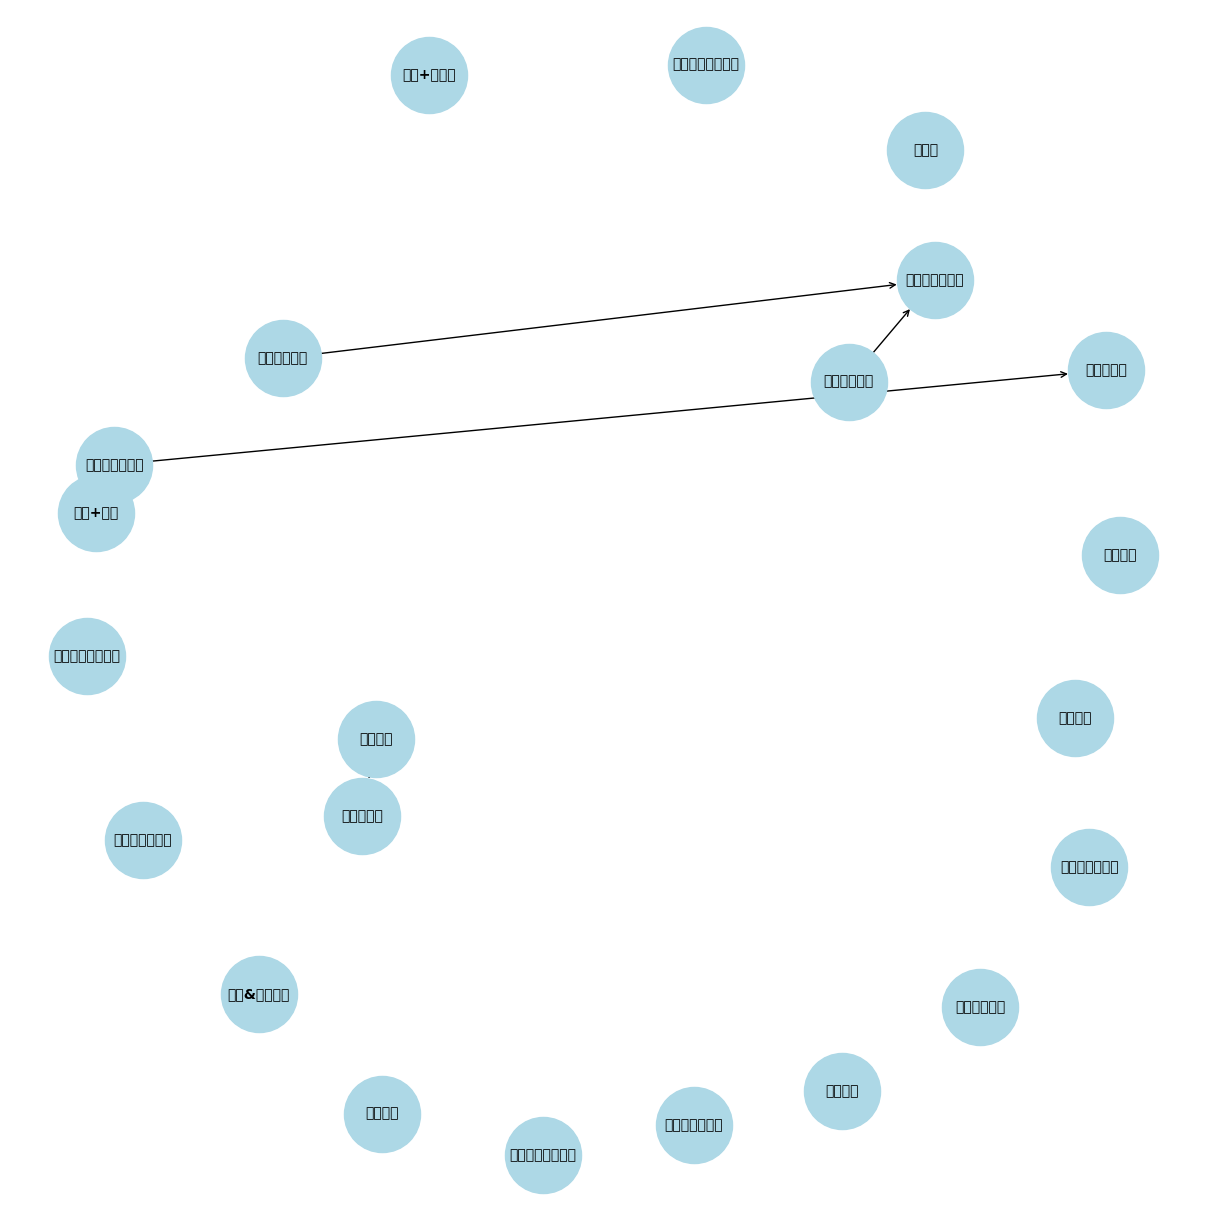

In [42]:
adj_matrix = model.adjacency_matrix_
threshold = 0.29
filtered_matrix = np.where(np.abs(adj_matrix) > threshold, adj_matrix, 0)

# Optionally, you can visualize the filtered adjacency matrix
def plot_adjacency_matrix(matrix, labels):
    G = nx.DiGraph(matrix)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, labels={i: labels[i] for i in range(len(labels))}, 
            node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', 
            arrows=True, arrowstyle='->', arrowsize=10, edge_color='black')
    plt.show()

# If df_std is a DataFrame, use its columns as labels
if isinstance(df_std, pd.DataFrame):
    labels = df_std.columns
else:
    labels = range(len(filtered_matrix))

plot_adjacency_matrix(filtered_matrix, labels)

In [34]:
%%time
# RCD
print(time.ctime())
model = lingam.RCD()
model.fit(df_std)
print(time.ctime())

# DAGを保存するなら実行
save_pickle = 'pickles'
os.makedirs(save_pickle, exist_ok=True)
#with open(save_pickle+'/model_RCD.pickle', mode='wb') as f:
#    pickle.dump(model, f)

Thu Jun 27 16:22:34 2024
Thu Jun 27 16:22:56 2024
CPU times: user 2min 5s, sys: 22.9 s, total: 2min 28s
Wall time: 22.1 s


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23433 (\N{CJK UNIFIED IDEOGRAPH-5B89}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20840 (\N{CJK UNIFIED IDEOGRAPH-5168}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36939 (\N{CJK UNIFIED IDEOGRAPH-904B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36578 (\N{CJK UNIFIED IDEOGRAPH-8EE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from current font.
  fig.canvas.print_figure(b

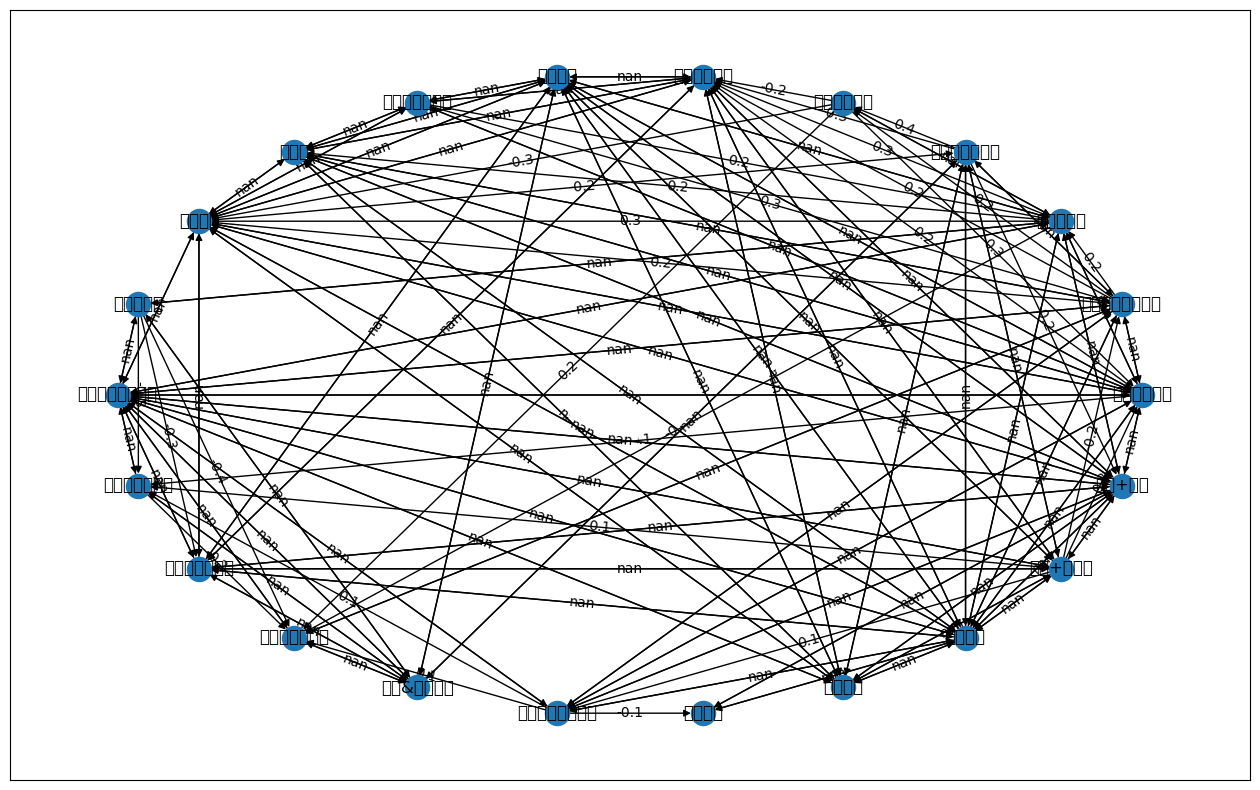

In [35]:
# 隣接行列を有向グラフで可視化(networkx使用)
#print(model.causal_order_)
#print(np.array(colsname)[model.causal_order_])
#print(model.adjacency_matrix_)

adjacency_ = pd.DataFrame(model.adjacency_matrix_, columns=colsname, index=colsname)
G=nx.from_pandas_adjacency(adjacency_.T, create_using=nx.DiGraph)  # 列が原因、行が結果なのでnetworkxでは転置の必要がある
plt.figure(figsize=(16,10))
#pos = nx.bipartite_layout(G, colsname[:5])
#pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
edge_labels = edge_labels = dict([((u,v,), f"{d['weight']:.1f}") for u,v,d in G.edges(data=True)])#nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw_networkx(G, pos)
plt.grid(False)
plt.show()

# 隣接行列を有向グラフで可視化(make_dot使用)
#make_dot(model.adjacency_matrix_, labels=colsname)

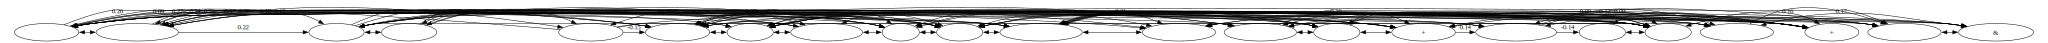

In [36]:
# 隣接行列を有向グラフで可視化(make_dot使用)
make_dot(model.adjacency_matrix_, labels=list(colsname))